In [2]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
import matplotlib.ticker as mtick

In [3]:
pd.__version__

'1.1.3'

In [4]:
protein_csv = "../gtdb95-evolpaths.pathcompare.protein-input.csv.gz"
dna_csv = "../gtdb95-evolpaths.pathcompare.dna-input.csv.gz"
fastani_tsv = "../gtdb95-evolpaths.fastani.tsv"

In [5]:
protDF = pd.read_csv(protein_csv, sep=",")
protDF

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,100,0.261496,0.613636,0.613636,5236,10264,3213,protein-7
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,protein,7,100,0.026196,0.068182,0.068182,5236,8749,357,protein-7
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,protein,7,100,0.007171,0.017189,0.017189,5236,7404,90,protein-7
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,protein,7,100,0.007075,0.019672,0.019672,5236,9426,103,protein-7
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,protein,7,100,0.003614,0.013369,0.013369,5236,14203,70,protein-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177415,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,hp,35,100,0.029491,0.066934,0.066934,5229,6989,350,hp-35
177416,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,hp,35,100,0.005846,0.012813,0.012813,5229,6299,67,hp-35
177417,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,hp,35,100,0.001075,0.003060,0.003060,5229,9667,16,hp-35
177418,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,hp,35,100,0.001791,0.004747,0.002869,5229,3160,15,hp-35


In [6]:
# any zeroes?
print(protDF[protDF["jaccard"] == 0].lowest_common_rank.unique())
protDF[protDF["jaccard"] == 0]

['superkingdom' 'phylum' 'class' 'order' 'family']


,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
17795,GCA_002254825.2_x_GCA_003661365.1,GCA_002254825.2,GCA_003661365.1,path9,superkingdom,protein,9,100,0.0,0.0,0.0,3029,5168,0,protein-9
17879,GCA_002719395.1_x_GCA_003661365.1,GCA_002719395.1,GCA_003661365.1,path23,superkingdom,protein,9,100,0.0,0.0,0.0,5199,5168,0,protein-9
17891,GCA_003602665.1_x_GCA_003661365.1,GCA_003602665.1,GCA_003661365.1,path25,superkingdom,protein,9,100,0.0,0.0,0.0,4924,5168,0,protein-9
17897,GCA_002723635.1_x_GCA_003661365.1,GCA_002723635.1,GCA_003661365.1,path26,superkingdom,protein,9,100,0.0,0.0,0.0,4202,5168,0,protein-9
17903,GCA_002718195.1_x_GCA_003661365.1,GCA_002718195.1,GCA_003661365.1,path27,superkingdom,protein,9,100,0.0,0.0,0.0,6093,5168,0,protein-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171653,GCA_003452275.1_x_GCA_003864455.1,GCA_003452275.1,GCA_003864455.1,path1996,superkingdom,hp,35,100,0.0,0.0,0.0,3943,6072,0,hp-35
175329,GCA_004296495.1_x_GCA_002342165.1,GCA_004296495.1,GCA_002342165.1,path2609,class,hp,35,100,0.0,0.0,0.0,597,5356,0,hp-35
175330,GCA_004296495.1_x_GCF_004358185.1,GCA_004296495.1,GCF_004358185.1,path2609,phylum,hp,35,100,0.0,0.0,0.0,597,12350,0,hp-35
176369,GCA_002711285.1_x_GCA_003864455.1,GCA_002711285.1,GCA_003864455.1,path2782,superkingdom,hp,35,100,0.0,0.0,0.0,2253,6072,0,hp-35


In [7]:
print(protDF[protDF["max_containment"] == 0].lowest_common_rank.unique())
protDF[protDF["max_containment"] == 0]

['superkingdom' 'phylum' 'class' 'order' 'family']


,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
17795,GCA_002254825.2_x_GCA_003661365.1,GCA_002254825.2,GCA_003661365.1,path9,superkingdom,protein,9,100,0.0,0.0,0.0,3029,5168,0,protein-9
17879,GCA_002719395.1_x_GCA_003661365.1,GCA_002719395.1,GCA_003661365.1,path23,superkingdom,protein,9,100,0.0,0.0,0.0,5199,5168,0,protein-9
17891,GCA_003602665.1_x_GCA_003661365.1,GCA_003602665.1,GCA_003661365.1,path25,superkingdom,protein,9,100,0.0,0.0,0.0,4924,5168,0,protein-9
17897,GCA_002723635.1_x_GCA_003661365.1,GCA_002723635.1,GCA_003661365.1,path26,superkingdom,protein,9,100,0.0,0.0,0.0,4202,5168,0,protein-9
17903,GCA_002718195.1_x_GCA_003661365.1,GCA_002718195.1,GCA_003661365.1,path27,superkingdom,protein,9,100,0.0,0.0,0.0,6093,5168,0,protein-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171653,GCA_003452275.1_x_GCA_003864455.1,GCA_003452275.1,GCA_003864455.1,path1996,superkingdom,hp,35,100,0.0,0.0,0.0,3943,6072,0,hp-35
175329,GCA_004296495.1_x_GCA_002342165.1,GCA_004296495.1,GCA_002342165.1,path2609,class,hp,35,100,0.0,0.0,0.0,597,5356,0,hp-35
175330,GCA_004296495.1_x_GCF_004358185.1,GCA_004296495.1,GCF_004358185.1,path2609,phylum,hp,35,100,0.0,0.0,0.0,597,12350,0,hp-35
176369,GCA_002711285.1_x_GCA_003864455.1,GCA_002711285.1,GCA_003864455.1,path2782,superkingdom,hp,35,100,0.0,0.0,0.0,2253,6072,0,hp-35


In [8]:
print(protDF[protDF["anchor_containment"] == 0].lowest_common_rank.unique())
protDF[protDF["anchor_containment"] == 0]

['superkingdom' 'phylum' 'class' 'order' 'family']


,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
17795,GCA_002254825.2_x_GCA_003661365.1,GCA_002254825.2,GCA_003661365.1,path9,superkingdom,protein,9,100,0.0,0.0,0.0,3029,5168,0,protein-9
17879,GCA_002719395.1_x_GCA_003661365.1,GCA_002719395.1,GCA_003661365.1,path23,superkingdom,protein,9,100,0.0,0.0,0.0,5199,5168,0,protein-9
17891,GCA_003602665.1_x_GCA_003661365.1,GCA_003602665.1,GCA_003661365.1,path25,superkingdom,protein,9,100,0.0,0.0,0.0,4924,5168,0,protein-9
17897,GCA_002723635.1_x_GCA_003661365.1,GCA_002723635.1,GCA_003661365.1,path26,superkingdom,protein,9,100,0.0,0.0,0.0,4202,5168,0,protein-9
17903,GCA_002718195.1_x_GCA_003661365.1,GCA_002718195.1,GCA_003661365.1,path27,superkingdom,protein,9,100,0.0,0.0,0.0,6093,5168,0,protein-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171653,GCA_003452275.1_x_GCA_003864455.1,GCA_003452275.1,GCA_003864455.1,path1996,superkingdom,hp,35,100,0.0,0.0,0.0,3943,6072,0,hp-35
175329,GCA_004296495.1_x_GCA_002342165.1,GCA_004296495.1,GCA_002342165.1,path2609,class,hp,35,100,0.0,0.0,0.0,597,5356,0,hp-35
175330,GCA_004296495.1_x_GCF_004358185.1,GCA_004296495.1,GCF_004358185.1,path2609,phylum,hp,35,100,0.0,0.0,0.0,597,12350,0,hp-35
176369,GCA_002711285.1_x_GCA_003864455.1,GCA_002711285.1,GCA_003864455.1,path2782,superkingdom,hp,35,100,0.0,0.0,0.0,2253,6072,0,hp-35


In [9]:
# replace zeroes with np.nan
cols = ["jaccard", "anchor_containment", "max_containment"]
protDF[cols] = protDF[cols].replace({0:np.nan})
protDF

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,100,0.261496,0.613636,0.613636,5236,10264,3213,protein-7
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,protein,7,100,0.026196,0.068182,0.068182,5236,8749,357,protein-7
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,protein,7,100,0.007171,0.017189,0.017189,5236,7404,90,protein-7
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,protein,7,100,0.007075,0.019672,0.019672,5236,9426,103,protein-7
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,protein,7,100,0.003614,0.013369,0.013369,5236,14203,70,protein-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177415,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,hp,35,100,0.029491,0.066934,0.066934,5229,6989,350,hp-35
177416,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,hp,35,100,0.005846,0.012813,0.012813,5229,6299,67,hp-35
177417,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,hp,35,100,0.001075,0.003060,0.003060,5229,9667,16,hp-35
177418,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,hp,35,100,0.001791,0.004747,0.002869,5229,3160,15,hp-35


In [10]:
def similarity_to_evoldist(similarity, ksize, b1=1.0, b2=1.0, return_ANI=False):
    # orig used with jaccard; trying with jaccard, max containment, anchor containment
    # proportion of observed differences
    if similarity == 0:
        return np.nan # 1.0
    p = 1 - np.power(2*similarity/(similarity + 1),(1/float(ksize)))
    # corrected evolutionary distance
    d = -(b1*np.log((1-p)/b2))
    if return_ANI:
        return 1-d
    return d

def calculate_ANI_AAI(row):
    name = "ANI-AAI"
    if row["alphabet"] in ["protein", "dayhoff", "hp"]:
        name = "ANI-AAI"
    j_name = f"jaccard_{name}"
    mc_name = f"mc_{name}"
    ac_name = f"ac_{name}"
    row[j_name] = similarity_to_evoldist(row["jaccard"], row["ksize"], return_ANI=True)
    row[mc_name] = similarity_to_evoldist(row["max_containment"], row["ksize"], return_ANI=True)
    row[ac_name] = similarity_to_evoldist(row["anchor_containment"], row["ksize"], return_ANI=True)
    return row

In [11]:
protDF = protDF.apply(calculate_ANI_AAI, axis=1)
protDF

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,100,0.261496,0.613636,0.613636,5236,10264,3213,protein-7,0.874216,0.960901,0.960901
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,protein,7,100,0.026196,0.068182,0.068182,5236,8749,357,protein-7,0.575020,0.705945,0.705945
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,protein,7,100,0.007171,0.017189,0.017189,5236,7404,90,protein-7,0.392619,0.516086,0.516086
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,protein,7,100,0.007075,0.019672,0.019672,5236,9426,103,protein-7,0.390695,0.535012,0.535012
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,protein,7,100,0.003614,0.013369,0.013369,5236,14203,70,protein-7,0.295229,0.480721,0.480721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177415,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,hp,35,100,0.029491,0.066934,0.066934,5229,6989,350,hp-35,0.918298,0.940695,0.940695
177416,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,hp,35,100,0.005846,0.012813,0.012813,5229,6299,67,hp-35,0.872723,0.894947,0.894947
177417,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,hp,35,100,0.001075,0.003060,0.003060,5229,9667,16,hp-35,0.824483,0.854306,0.854306
177418,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,hp,35,100,0.001791,0.004747,0.002869,5229,3160,15,hp-35,0.839043,0.866804,0.852467


In [12]:
protDF.groupby("lowest_common_rank")["num_common"].describe()

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,29570.0,91.189753,88.657438,0.0,32.00,68.0,121.0,1165.0
family,29570.0,497.346567,462.785184,0.0,185.00,362.0,652.0,6352.0
genus,29570.0,2193.154921,2103.164467,10.0,778.25,1539.0,2871.0,21673.0
order,29570.0,174.360534,148.670195,0.0,72.00,132.0,235.0,2372.0
phylum,29570.0,59.675583,66.158116,0.0,22.00,41.0,73.0,2028.0
superkingdom,29570.0,33.306493,41.756290,0.0,12.00,20.0,38.0,639.0


In [13]:
protDF.groupby("lowest_common_rank")["num_common"].describe()

,count,mean,std,min,25%,50%,75%,max
lowest_common_rank,,,,,,,,
class,29570.0,91.189753,88.657438,0.0,32.00,68.0,121.0,1165.0
family,29570.0,497.346567,462.785184,0.0,185.00,362.0,652.0,6352.0
genus,29570.0,2193.154921,2103.164467,10.0,778.25,1539.0,2871.0,21673.0
order,29570.0,174.360534,148.670195,0.0,72.00,132.0,235.0,2372.0
phylum,29570.0,59.675583,66.158116,0.0,22.00,41.0,73.0,2028.0
superkingdom,29570.0,33.306493,41.756290,0.0,12.00,20.0,38.0,639.0


In [14]:
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]
reverse_rankorder = rankorder[::-1]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
dna_order=["DNA-21","DNA-31", "DNA-51"]
protein_order = ["protein-7", "protein-9", "protein-10", "protein-11"]
dayhoff_order = ["dayhoff-15", "dayhoff-17", "dayhoff-19"]
hp_order = ["hp-30", "hp-33", "hp-35"]

all_protein_order = protein_order + dayhoff_order + hp_order
alphak_order = nucl_order + protein_order + dayhoff_order + hp_order

alphabet_colors = {"nucleotide":"#b2182b", "protein": "#2166ac", "dayhoff": "#4393c3", "hp": "#92c5de"}
alphabet_order = ["nucleotide", "protein", "dayhoff", "hp"]
protnucl_colors = {"nucleotide":"#b2182b", "protein": "#2166ac"}
protnucl_order = ["nucleotide", "protein"]

pnlong_colors = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-10": "#2166ac"}
pnlong_colors2 = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-7": "#2166ac"}
pd_colors = {"DNA-21":"#b2182b","DNA-31":"#d6604d","DNA-51":"#f4a582", "protein-10": "#2166ac"}

alphak_colors = {}
nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}
protein_colors = {"protein-7": "#a1d99b", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c"} 
dayhoff_colors = {"dayhoff-15": "#9e9ac8", "dayhoff-17": "#756bb1", "dayhoff-19": "#54278f"}
hp_colors = {"hp-30": "#6baed6", "hp-33": "#3182bd", "hp-35": "#08519c"}

alphak_colors = nucl_colors
alphak_colors.update(protein_colors)
alphak_colors.update(dayhoff_colors)
alphak_colors.update(hp_colors)

rankcolors = {"superkingdom": "#ffc000", "phylum": "#00b300", "class": "#329932", "order": "#2b9d91", "family": "#1c8cc3", "genus": "#074191"}


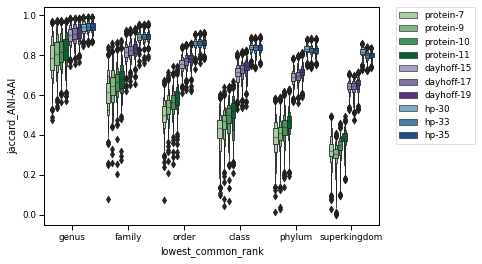

In [15]:
g=sns.boxenplot(data=protDF, x="lowest_common_rank", y="jaccard_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=all_protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

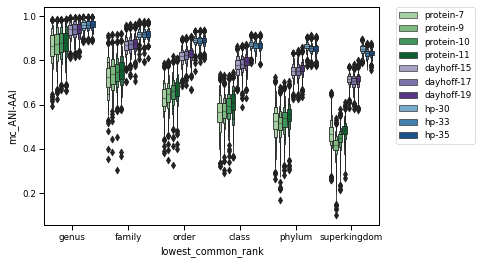

In [16]:
g=sns.boxenplot(data=protDF, x="lowest_common_rank", y="mc_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=all_protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

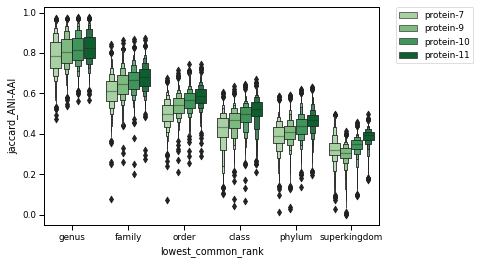

In [17]:
g=sns.boxenplot(data=protDF, x="lowest_common_rank", y="jaccard_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

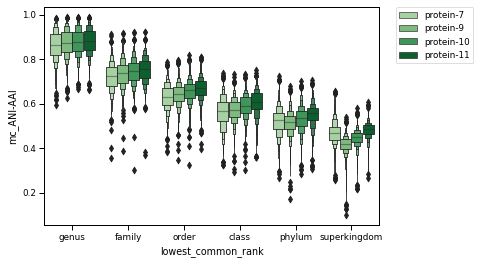

In [18]:
g=sns.boxenplot(data=protDF, x="lowest_common_rank", y="mc_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

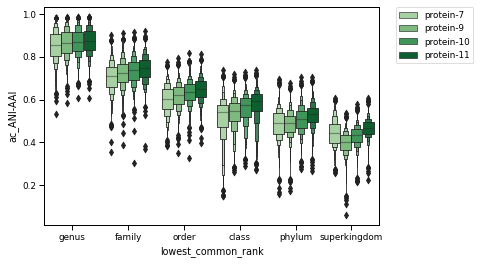

In [19]:
#anchor containment
g=sns.boxenplot(data=protDF, x="lowest_common_rank", y="ac_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

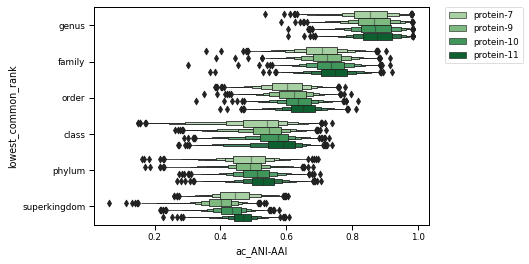

In [20]:
#anchor containment -- FLIP x and y
g=sns.boxenplot(data=protDF, y="lowest_common_rank", x="ac_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=protein_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

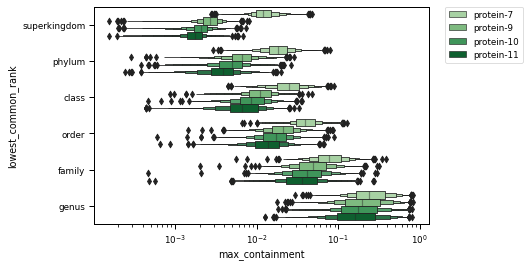

In [21]:
g=sns.boxenplot(data=protDF, y="lowest_common_rank", x="max_containment", hue="alpha-ksize", palette=alphak_colors, order=rankorder[::-1], hue_order=protein_order ) #palette="GnBu_d"
g.set(xscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

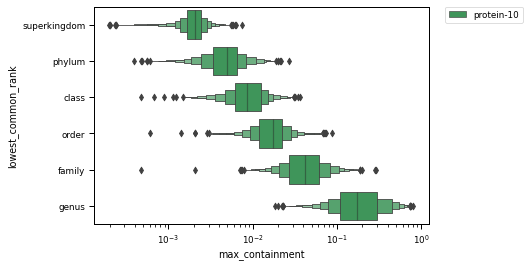

In [22]:
g=sns.boxenplot(data=protDF, y="lowest_common_rank", x="max_containment", hue="alpha-ksize", palette=alphak_colors, order=reverse_rankorder, hue_order=["protein-10"]) #palette="GnBu_d"
g.set(xscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

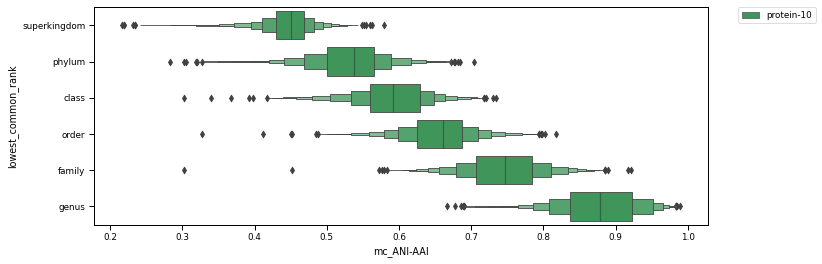

In [23]:
g=sns.boxenplot(data=protDF, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=reverse_rankorder, hue_order=["protein-10"]) #palette="GnBu_d"
plt.gcf().set_size_inches(11, 4)
#g.set(xscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

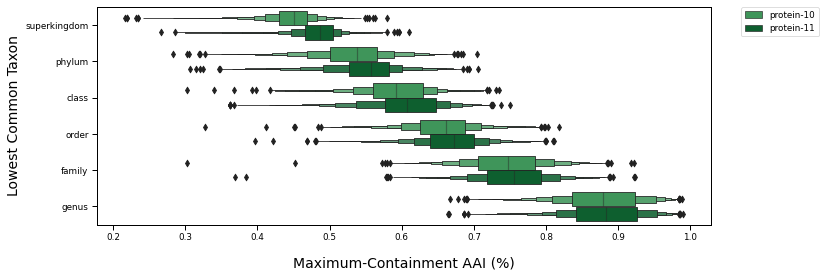

In [24]:
g=sns.boxenplot(data=protDF, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=rankorder[::-1], hue_order=["protein-10", "protein-11"]) #palette="GnBu_d"
plt.gcf().set_size_inches(11, 4)
plt.xlabel("Maximum-Containment AAI (%)", size=14, labelpad=15)
plt.ylabel("Lowest Common Taxon", size=14)
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

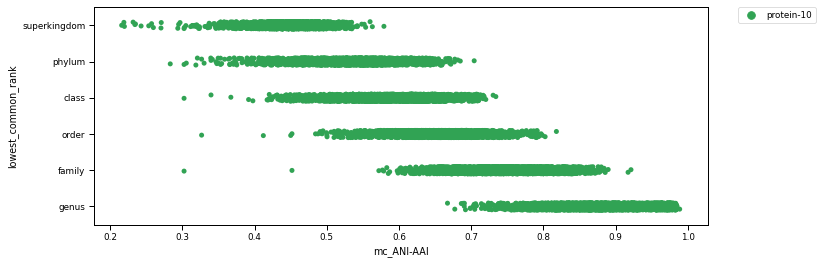

In [25]:
g=sns.stripplot(data=protDF, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=reverse_rankorder, hue_order=["protein-10"]) #palette="GnBu_d"
#g.set(xscale="log")
plt.gcf().set_size_inches(11, 4)
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [26]:
p10 = protDF[protDF["alpha-ksize"] == "protein-10"]

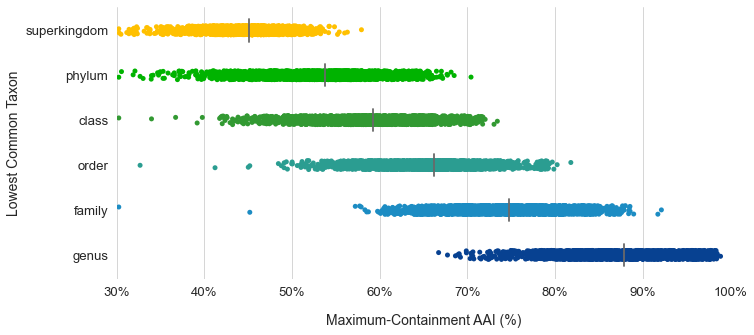

In [27]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("whitegrid")
    g=sns.stripplot(data=protDF[protDF["alpha-ksize"] == "protein-10"], y="lowest_common_rank", x="mc_ANI-AAI", hue="lowest_common_rank", palette=rankcolors, order=reverse_rankorder)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.legend_.remove()
    #x = plt.gca().axes.get_xlim()
    median_width = 0.5
    order = 3
    for tick, text in zip(g.get_yticks(), g.get_yticklabels()):
        rank = text.get_text()
        median_val = p10.loc[p10["lowest_common_rank"] == rank].median()['mc_ANI-AAI']
        g.plot([median_val, median_val],[tick-median_width/2, tick+median_width/2],lw=1.8, color='dimgray', zorder=order)
        order+=1

    # format x ticks as %
    plt.gcf().set_size_inches(11, 5)
    g.set(xlim=(0.3, 1))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment AAI (%)", size=14, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=14)
    #g.axis("off")
    g.spines["right"].set_visible(False)
    g.spines["top"].set_visible(False)
    g.spines["left"].set_visible(False)
    g.spines["bottom"].set_visible(False)
    fig = g.get_figure()
    fig.savefig("gtdb95-evolpaths-mcAAI.png",bbox_inches='tight')
    fig.savefig("gtdb95-evolpaths-mcAAI.pdf",bbox_inches='tight')

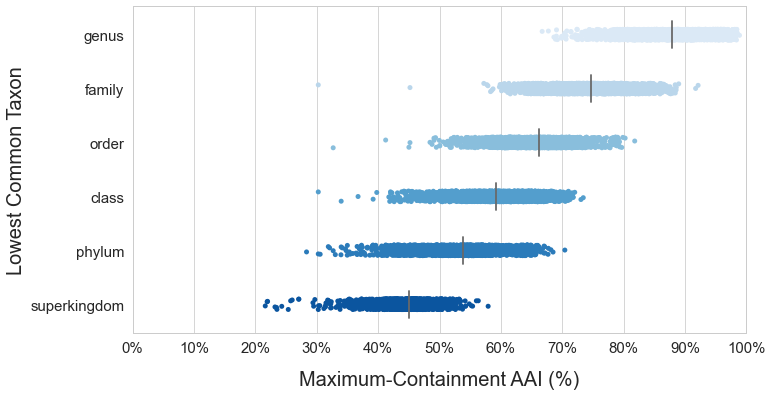

In [28]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("whitegrid")
    g=sns.stripplot(data=p10, y="lowest_common_rank", x="mc_ANI-AAI", hue="lowest_common_rank", palette="Blues", order=rankorder)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.legend_.remove()
    #x = plt.gca().axes.get_xlim()
    median_width = 0.5
    order = 3
    for tick, text in zip(g.get_yticks(), g.get_yticklabels()):
        rank = text.get_text()
        median_val = p10.loc[p10["lowest_common_rank"] == rank].median()['mc_ANI-AAI']
        g.plot([median_val, median_val],[tick-median_width/2, tick+median_width/2],lw=1.8, color='dimgray', zorder=order)
        order+=1

    # format x ticks as %
    plt.gcf().set_size_inches(11, 6)
    g.set(xlim=(0, 1))
    g.xaxis.set_major_locator(mtick.MultipleLocator(0.1))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    #g.axis("off")
    #g.spines["right"].set_visible(False)
    #g.spines["top"].set_visible(False)
    #g.spines["left"].set_visible(False)
    #g.spines["bottom"].set_visible(False)
    fig = g.get_figure()
    fig.savefig("gtdb95-evolpaths-mcAAI.REDformat.png",bbox_inches='tight')
    fig.savefig("gtdb95-evolpaths-mcAAI.REDformat.pdf",bbox_inches='tight')

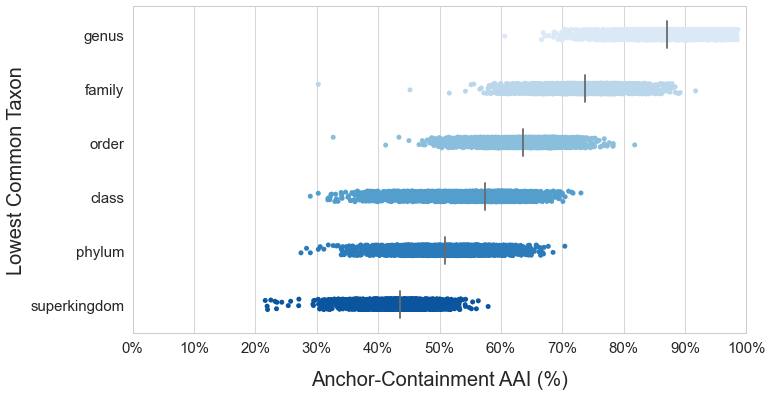

In [29]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("whitegrid")
    g=sns.stripplot(data=p10, y="lowest_common_rank", x="ac_ANI-AAI", hue="lowest_common_rank", palette="Blues", order=rankorder)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.legend_.remove()
    #x = plt.gca().axes.get_xlim()
    median_width = 0.5
    order = 3
    for tick, text in zip(g.get_yticks(), g.get_yticklabels()):
        rank = text.get_text()
        median_val = p10.loc[p10["lowest_common_rank"] == rank].median()['ac_ANI-AAI']
        g.plot([median_val, median_val],[tick-median_width/2, tick+median_width/2],lw=1.8, color='dimgray', zorder=order)
        order+=1

    # format x ticks as %
    plt.gcf().set_size_inches(11, 6)
    g.set(xlim=(0, 1))
    g.xaxis.set_major_locator(mtick.MultipleLocator(0.1))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Anchor-Containment AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    #g.axis("off")
    #g.spines["right"].set_visible(False)
    #g.spines["top"].set_visible(False)
    #g.spines["left"].set_visible(False)
    #g.spines["bottom"].set_visible(False)
    fig = g.get_figure()
    fig.savefig("gtdb95-evolpaths-acAAI.REDformat.png",bbox_inches='tight')
    fig.savefig("gtdb95-evolpaths-acAAI.REDformat.pdf",bbox_inches='tight')

In [30]:
# get median values
median_vals = {}
for rank in rankorder:
    med = p10.loc[p10["lowest_common_rank"] == rank].median()['mc_ANI-AAI']
    median_vals[rank] = med
print(median_vals)

{'genus': 0.8786309856434251, 'family': 0.7469591768314181, 'order': 0.6616028321842422, 'class': 0.5919585343311397, 'phylum': 0.5378413576677247, 'superkingdom': 0.45041646297767257}


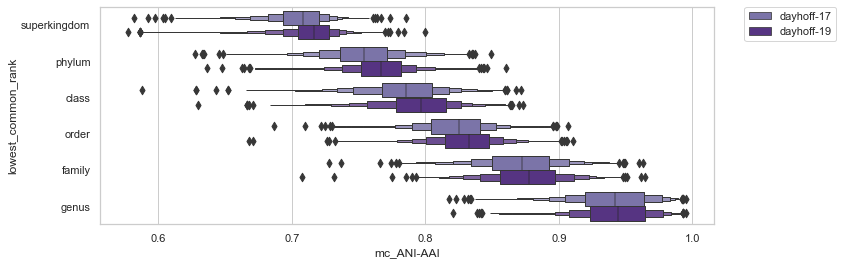

In [31]:
g=sns.boxenplot(data=protDF, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=alphak_colors, order=rankorder[::-1], hue_order=["dayhoff-17", "dayhoff-19"]) #palette="GnBu_d"
#g.set(xscale="log")
plt.gcf().set_size_inches(11, 4)
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [32]:
# calculate pdist, evoldist, ANI / AAI
#jaccardMelt_noz["pdist"] =  1- ((2*jaccardMelt_noz["jaccard"]/(jaccardMelt_noz["jaccard"]+1))** (1/jaccardMelt_noz["ksize"]))
#jaccardMelt_noz["evol-1dist"] = -np.log(1 - jaccardMelt_noz["pdist"]) #default log base is e

In [33]:
# dna input
dnaDF = pd.read_csv(dna_csv, sep=",")
dnaDF["anchor_name"] = dnaDF["anchor_name"].str.rsplit(" ", expand=True)[0]
dnaDF["ref_name"] = dnaDF["ref_name"].str.rsplit(" ", expand=True)[0]
# replace zeroes with np.nan
cols = ["jaccard", "anchor_containment", "max_containment"]
dnaDF[cols] = dnaDF[cols].replace({0:np.nan})
dnaDF

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,DNA,21,100,0.160974,0.412247,0.412247,1829,3609,754,DNA-21
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,DNA,21,100,0.000201,0.000547,0.000547,1829,3157,1,DNA-21
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,DNA,21,100,NaN,NaN,NaN,1829,2542,0,DNA-21
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,DNA,21,100,0.000373,0.001093,0.001093,1829,3542,2,DNA-21
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,DNA,21,100,NaN,NaN,NaN,1829,5537,0,DNA-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230641,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,hp,35,100,0.004162,0.009712,0.009712,37686,50621,366,hp-35
230642,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,hp,35,100,0.000820,0.001778,0.001778,37686,44125,67,hp-35
230643,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,hp,35,100,0.000151,0.000451,0.000451,37686,75026,17,hp-35
230644,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,hp,35,100,0.000235,0.000575,0.000398,37686,26095,15,hp-35


In [34]:
dnaD = dnaDF.apply(calculate_ANI_AAI, axis=1)
dnaD

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,DNA,21,100,0.160974,0.412247,0.412247,1829,3609,754,DNA-21,0.938923,0.974373,0.974373
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,DNA,21,100,0.000201,0.000547,0.000547,1829,3157,1,DNA-21,0.627560,0.675289,0.675289
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,DNA,21,100,NaN,NaN,NaN,1829,2542,0,DNA-21,NaN,NaN,NaN
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,DNA,21,100,0.000373,0.001093,0.001093,1829,3542,2,DNA-21,0.657025,0.708270,0.708270
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,DNA,21,100,NaN,NaN,NaN,1829,5537,0,DNA-21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230641,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,hp,35,100,0.004162,0.009712,0.009712,37686,50621,366,hp-35,0.863063,0.887116,0.887116
230642,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,hp,35,100,0.000820,0.001778,0.001778,37686,44125,67,hp-35,0.816734,0.838829,0.838829
230643,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,hp,35,100,0.000151,0.000451,0.000451,37686,75026,17,hp-35,0.768393,0.799682,0.799682
230644,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,hp,35,100,0.000235,0.000575,0.000398,37686,26095,15,hp-35,0.781085,0.806604,0.796107


In [35]:
dna_only = dnaD[dnaD["alpha-ksize"].isin(dna_order)]
dna_only

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,DNA,21,100,0.160974,0.412247,0.412247,1829,3609,754,DNA-21,0.938923,0.974373,0.974373
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,DNA,21,100,0.000201,0.000547,0.000547,1829,3157,1,DNA-21,0.627560,0.675289,0.675289
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,DNA,21,100,NaN,NaN,NaN,1829,2542,0,DNA-21,NaN,NaN,NaN
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,DNA,21,100,0.000373,0.001093,0.001093,1829,3542,2,DNA-21,0.657025,0.708270,0.708270
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,DNA,21,100,NaN,NaN,NaN,1829,5537,0,DNA-21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53221,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,DNA,51,100,0.000223,0.000516,0.000516,1938,2538,1,DNA-51,0.848758,0.865161,0.865161
53222,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,DNA,51,100,NaN,NaN,NaN,1938,2120,0,DNA-51,NaN,NaN,NaN
53223,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,DNA,51,100,NaN,NaN,NaN,1938,3826,0,DNA-51,NaN,NaN,NaN
53224,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,DNA,51,100,NaN,NaN,NaN,1938,1370,0,DNA-51,NaN,NaN,NaN


In [36]:
# join dna, reference protein numbers
p10

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
35484,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,10,100,0.222701,0.537187,0.537187,5190,10117,2788,protein-10,0.899016,0.964178,0.964178
35485,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,protein,10,100,0.015494,0.040462,0.040462,5190,8574,210,protein-10,0.651044,0.744610,0.744610
35486,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,protein,10,100,0.002220,0.005395,0.005395,5190,7449,28,protein-10,0.458081,0.546548,0.546548
35487,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,protein,10,100,0.001969,0.005588,0.005588,5190,9569,29,protein-10,0.446083,0.550038,0.550038
35488,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,protein,10,100,0.000457,0.001734,0.001734,5190,14523,9,protein-10,0.300134,0.433415,0.433415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53221,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,protein,10,100,0.029909,0.066030,0.066030,5755,7330,380,protein-10,0.715410,0.791155,0.791155
53222,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,protein,10,100,0.006358,0.013901,0.013901,5755,6907,80,protein-10,0.562881,0.640354,0.640354
53223,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,protein,10,100,0.001934,0.005387,0.005387,5755,10307,31,protein-10,0.444292,0.546394,0.546394
53224,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,protein,10,100,0.003389,0.009059,0.005387,5755,3422,31,protein-10,0.500268,0.598014,0.546394


In [37]:
#p10_AAIonly= p10[["comparison_name", "ac_ANI-AAI", "mc_ANI-AAI", "jaccard_ANI-AAI"]]
protNucl = pd.concat([dna_only, p10])#, on=["comparison_name", "lowest_common_rank", "path", "scaled", "ksize", "alpha-ksize", "alphabet", "num_common"])
protNucl.columns

Index(['comparison_name', 'anchor_name', 'ref_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'anchor_hashes',
       'query_hashes', 'num_common', 'alpha-ksize', 'jaccard_ANI-AAI',
       'mc_ANI-AAI', 'ac_ANI-AAI'],
      dtype='object')

In [38]:
protNucl

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,DNA,21,100,0.160974,0.412247,0.412247,1829,3609,754,DNA-21,0.938923,0.974373,0.974373
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,DNA,21,100,0.000201,0.000547,0.000547,1829,3157,1,DNA-21,0.627560,0.675289,0.675289
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,DNA,21,100,NaN,NaN,NaN,1829,2542,0,DNA-21,NaN,NaN,NaN
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,DNA,21,100,0.000373,0.001093,0.001093,1829,3542,2,DNA-21,0.657025,0.708270,0.708270
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,DNA,21,100,NaN,NaN,NaN,1829,5537,0,DNA-21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53221,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,protein,10,100,0.029909,0.066030,0.066030,5755,7330,380,protein-10,0.715410,0.791155,0.791155
53222,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,protein,10,100,0.006358,0.013901,0.013901,5755,6907,80,protein-10,0.562881,0.640354,0.640354
53223,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,protein,10,100,0.001934,0.005387,0.005387,5755,10307,31,protein-10,0.444292,0.546394,0.546394
53224,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,protein,10,100,0.003389,0.009059,0.005387,5755,3422,31,protein-10,0.500268,0.598014,0.546394


In [39]:
protNucl2 = protNucl[protNucl["ksize"] != 31]
protNucl2.ksize.unique()

array([21, 51, 10])

In [40]:
dna21=dna_only[dna_only["alpha-ksize"] == "DNA-21"]
dna21

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,DNA,21,100,0.160974,0.412247,0.412247,1829,3609,754,DNA-21,0.938923,0.974373,0.974373
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,DNA,21,100,0.000201,0.000547,0.000547,1829,3157,1,DNA-21,0.627560,0.675289,0.675289
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,DNA,21,100,NaN,NaN,NaN,1829,2542,0,DNA-21,NaN,NaN,NaN
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,DNA,21,100,0.000373,0.001093,0.001093,1829,3542,2,DNA-21,0.657025,0.708270,0.708270
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,DNA,21,100,NaN,NaN,NaN,1829,5537,0,DNA-21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17737,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,DNA,21,100,0.000223,0.000529,0.000529,1889,2587,1,DNA-21,0.632698,0.673753,0.673753
17738,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,DNA,21,100,NaN,NaN,NaN,1889,2140,0,DNA-21,NaN,NaN,NaN
17739,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,DNA,21,100,NaN,NaN,NaN,1889,3784,0,DNA-21,NaN,NaN,NaN
17740,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,DNA,21,100,NaN,NaN,NaN,1889,1273,0,DNA-21,NaN,NaN,NaN


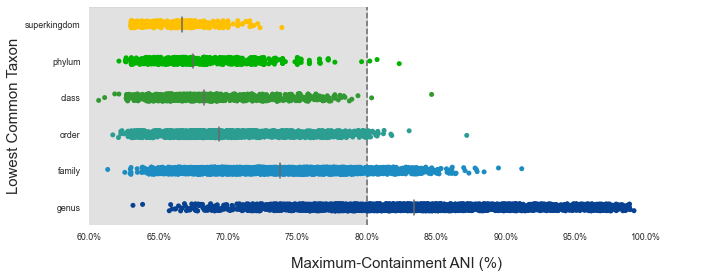

In [41]:
sns.set() # reset defaults
with sns.plotting_context("paper"):#, font_scale=1.5,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=dna21, y="lowest_common_rank", x="mc_ANI-AAI", hue="lowest_common_rank", palette=rankcolors, order=reverse_rankorder)
    g.legend_.remove()

    median_width = 0.4
    order = 3
    for tick, text in zip(g.get_yticks(), g.get_yticklabels()):
        rank = text.get_text()
        median_val = dna21.loc[dna21["lowest_common_rank"] == rank].median()['mc_ANI-AAI']
        g.plot([median_val, median_val],[tick-median_width/2, tick+median_width/2],lw=1.5, color='dimgray', zorder=order)
        order+=1
    # plot vertical line at 80% ANI    
    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    g.set(xlim=(0.6, None))
    # format x ticks as %
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment ANI (%)", size=15, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=15)
    #g.axis("off")
    g.spines["right"].set_visible(False)
    g.spines["top"].set_visible(False)
    g.spines["left"].set_visible(False)
    g.spines["bottom"].set_visible(False)
    plt.gcf().set_size_inches(11, 4)

    fig = g.get_figure()
    fig.savefig("gtdb95-evolpaths-mcANI.png",bbox_inches='tight')
    fig.savefig("gtdb95-evolpaths-mcANI.pdf",bbox_inches='tight')


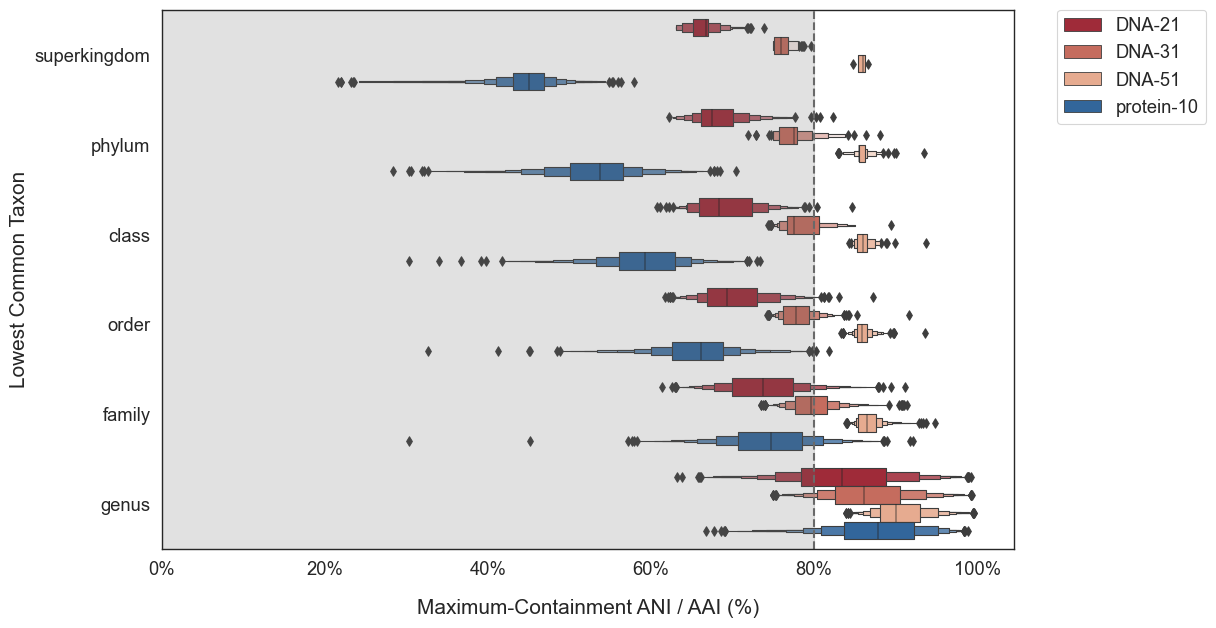

In [42]:
sns.reset_defaults()
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.boxenplot(data=protNucl, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=pd_colors, order=reverse_rankorder)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    g.set(xlim=(0, None))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment ANI / AAI (%)", size=15, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=15)
    fig = g.get_figure()

    fig.savefig("anchor-mcANI-AAI.boxen.protnucl.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-mcANI-AAI.boxen.protnucl.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

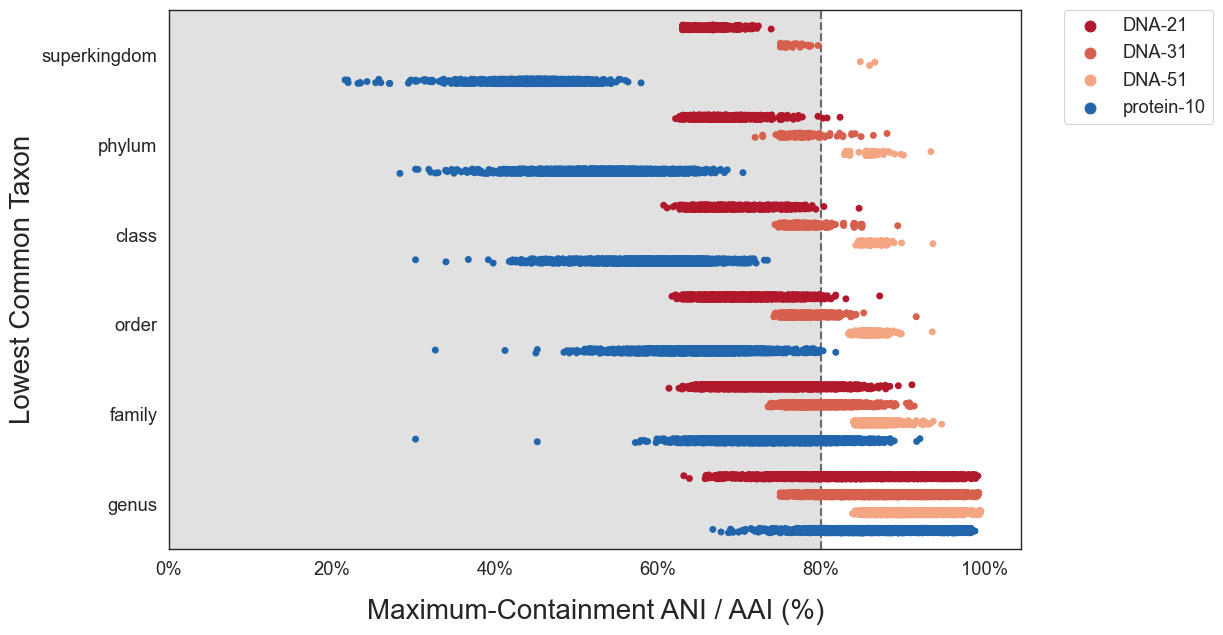

In [207]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15}):
    sns.set_style("white")
    g=sns.stripplot(data=protNucl, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=pd_colors, order=reverse_rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    g.set(xlim=(0, None))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment ANI / AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-mcANI-AAI.stripplot.protnucl.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-mcANI-AAI.stripplot.protnucl.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

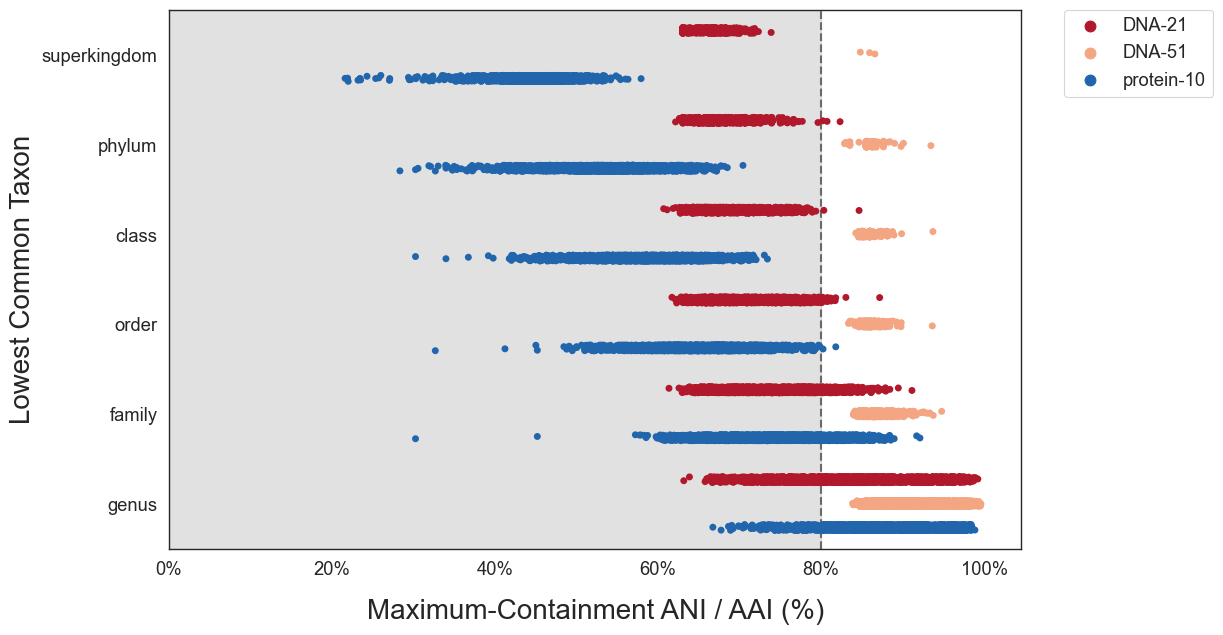

In [228]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=protNucl2, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=pd_colors, order=reverse_rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    g.set(xlim=(0, None))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment ANI / AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-mcANI-AAI.stripplot.protnucl2.rev.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-mcANI-AAI.stripplot.protnucl2.rev.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

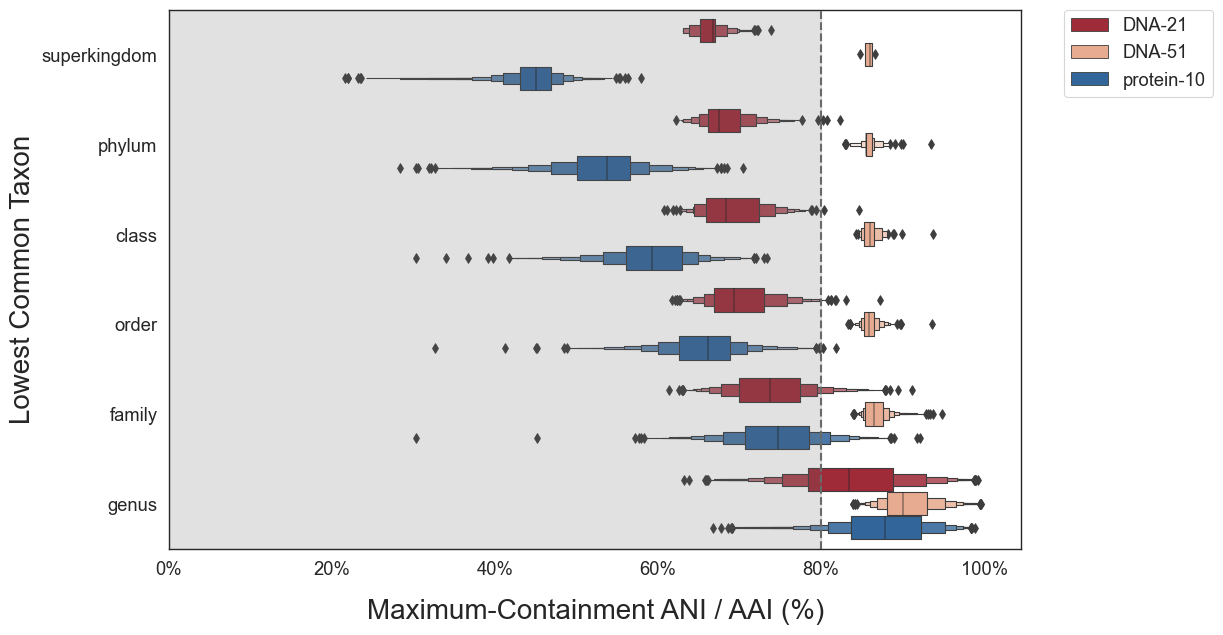

In [43]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.boxenplot(data=protNucl2, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=pd_colors, order=reverse_rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    g.set(xlim=(0, None))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment ANI / AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

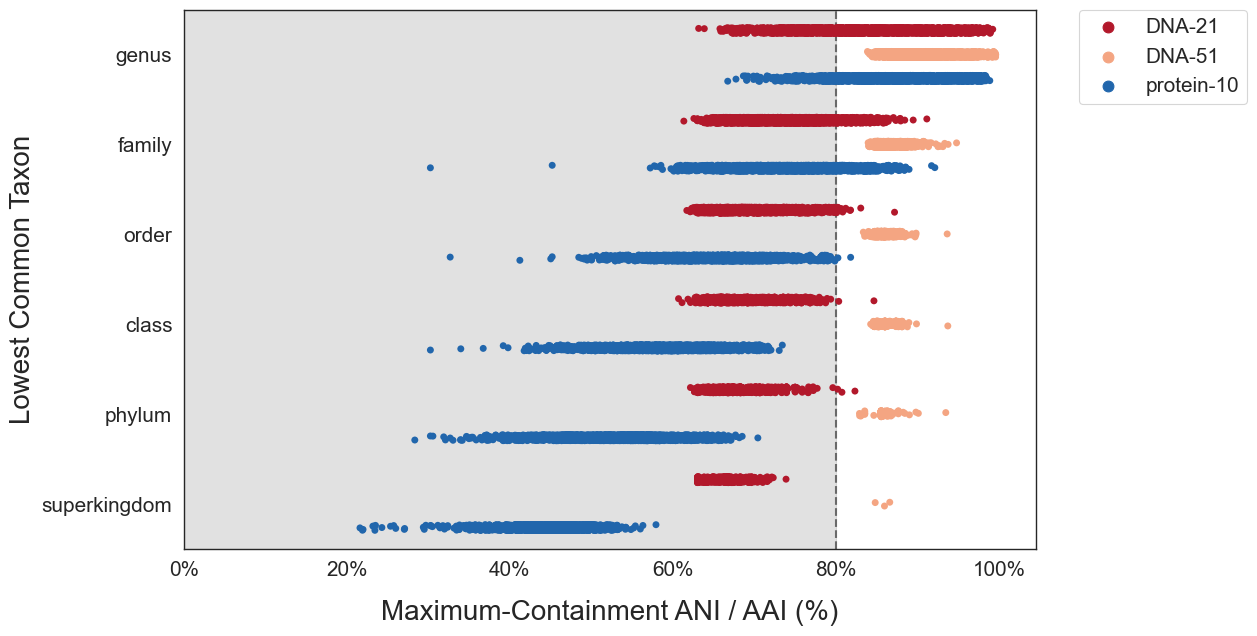

In [227]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=protNucl2, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=pd_colors, order=rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    g.set(xlim=(0, None))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment ANI / AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-mcANI-AAI.stripplot.protnucl2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-mcANI-AAI.stripplot.protnucl2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=protNucl2, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=pd_colors, order=reverse_rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    g.set(xlim=(0, None))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum-Containment ANI / AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-mcANI-AAI.stripplot.protnucl2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-mcANI-AAI.stripplot.protnucl2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [214]:
# replace zeroes with np.nan
cols = ["jaccard", "anchor_containment", "max_containment"]
protNucl[cols] = protNucl[cols].replace({0:np.nan})


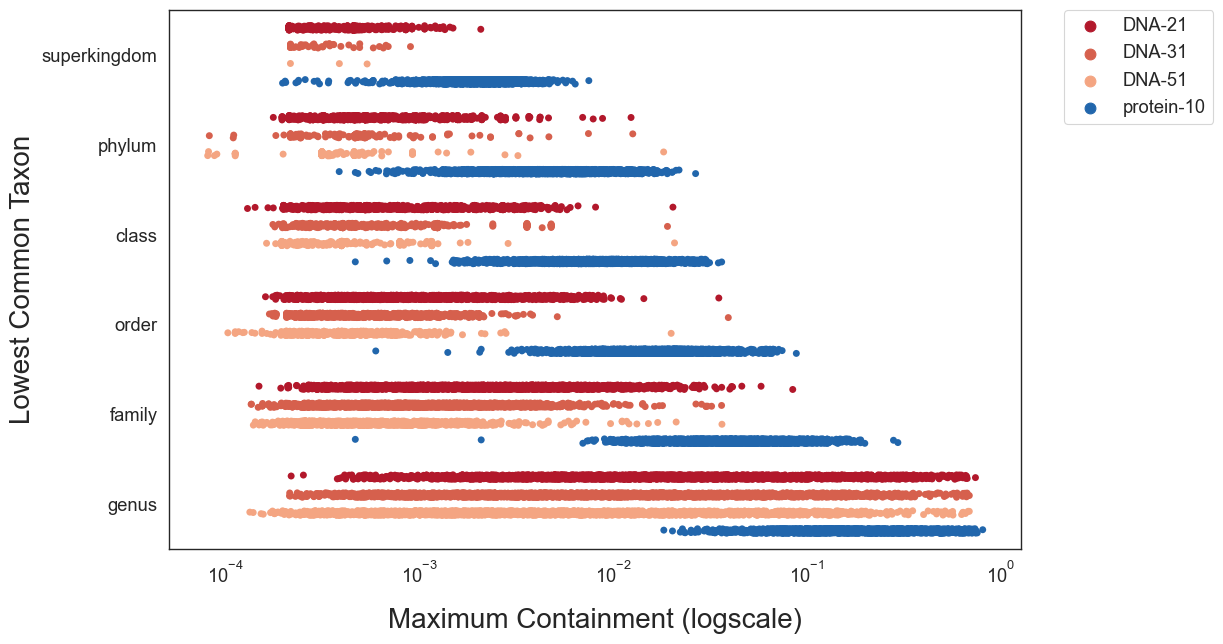

In [219]:
# plot log of max containment in same format
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=protNucl, y="lowest_common_rank", x="max_containment", hue="alpha-ksize", palette=pd_colors, order=reverse_rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    g.set(xscale="log")
    #plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    #plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    #g.set(xlim=(0, None))
    #g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum Containment (logscale)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-mc.stripplot.protnucl2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-mc.stripplot.protnucl2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

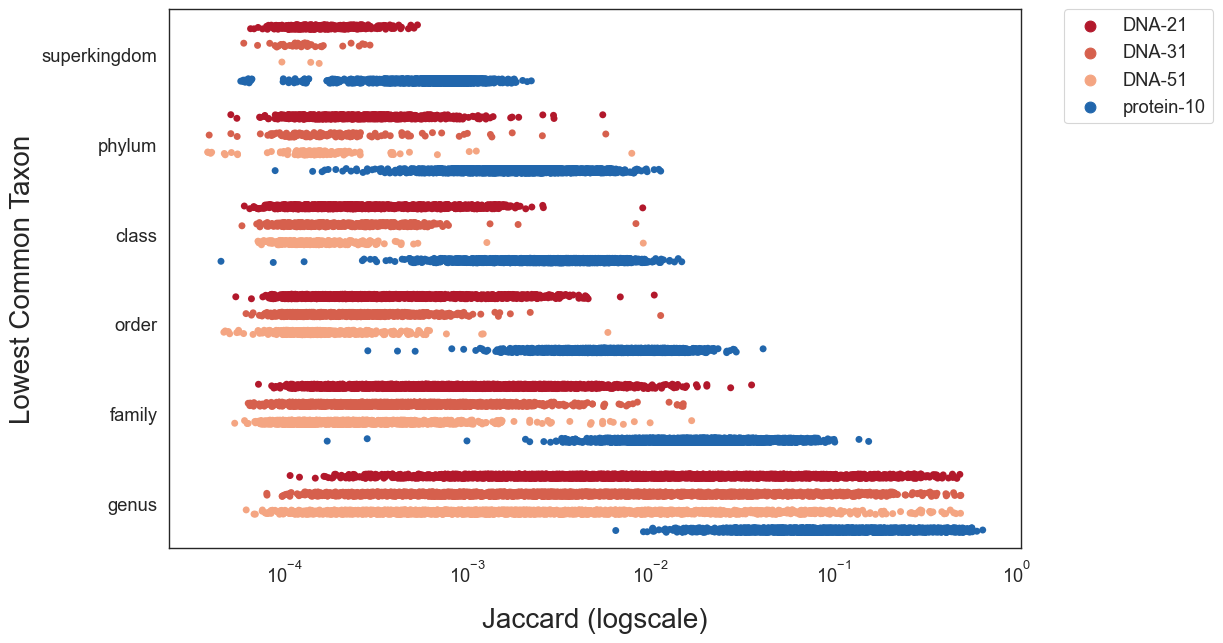

In [218]:
# plot log of max containment in same format
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.5,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=protNucl, y="lowest_common_rank", x="jaccard", hue="alpha-ksize", palette=pd_colors, order=reverse_rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    g.set(xscale="log")
    #plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    #plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    #g.set(xlim=(0, None))
    #g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Jaccard (logscale)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-jaccard.stripplot.protnucl2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-jaccard.stripplot.protnucl2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

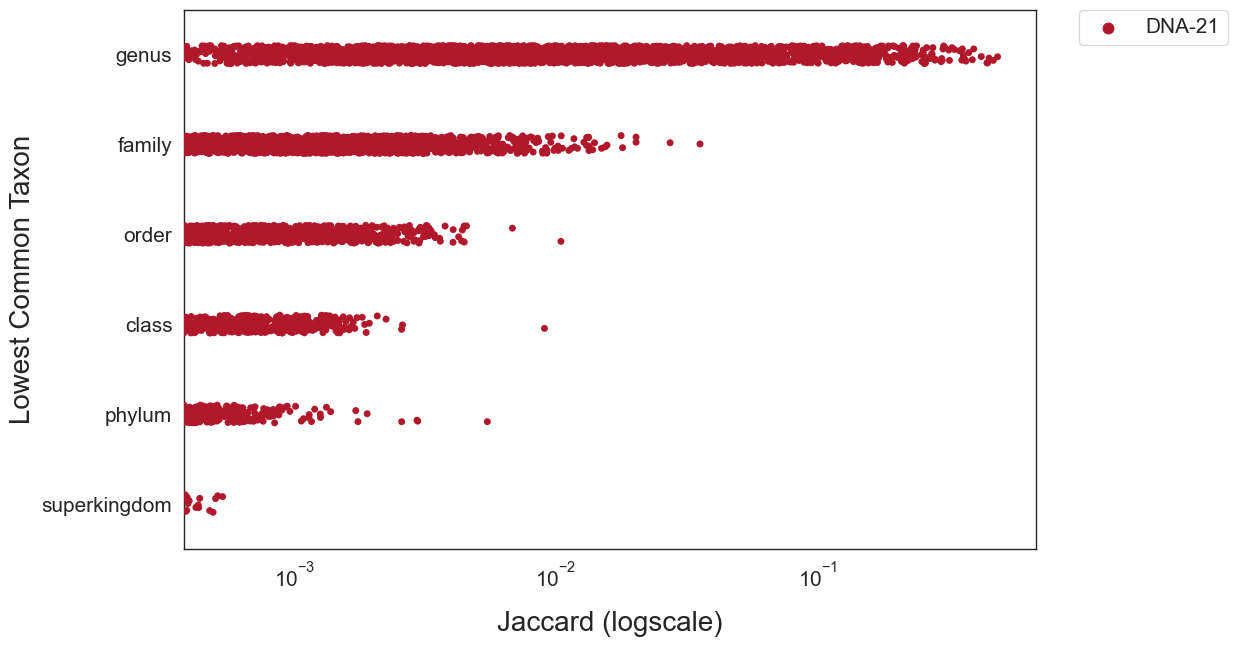

In [224]:
# plot log of max containment in same format
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=dna21, y="lowest_common_rank", x="jaccard", hue="alpha-ksize", palette=pd_colors, order=rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    #plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    #plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    #g.set(xlim=(0, None))
    #g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Jaccard", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-jaccard.stripplot.dna21.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-jaccard.stripplot.dna21.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    
    g.set(xscale="log")
    plt.xlabel("Jaccard (logscale)", size=20, labelpad=15)
    fig = g.get_figure()
    fig.savefig("anchor-jaccard.stripplot.dna21.log.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-jaccard.stripplot.dna21.log.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

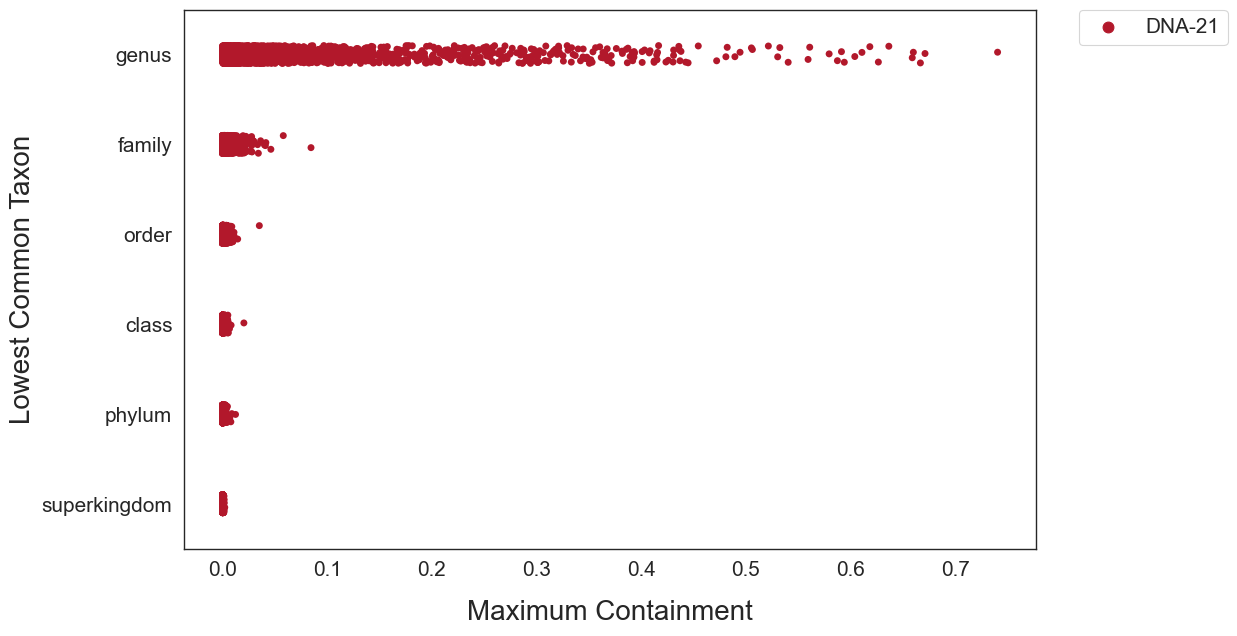

In [226]:
# plot log of max containment in same format
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=dna21, y="lowest_common_rank", x="max_containment", hue="alpha-ksize", palette=pd_colors, order=rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    #plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    #plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    #g.set(xlim=(0, None))
    #g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum Containment", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-mc.stripplot.dna21.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-mc.stripplot.dna21.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    
    #g.set(xscale="log")
    #plt.xlabel("Jaccard (logscale)", size=20, labelpad=15)
    #fig = g.get_figure()
    #fig.savefig("anchor-jaccard.stripplot.dna21.log.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    #fig.savefig("anchor-jaccard.stripplot.dna21.log.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

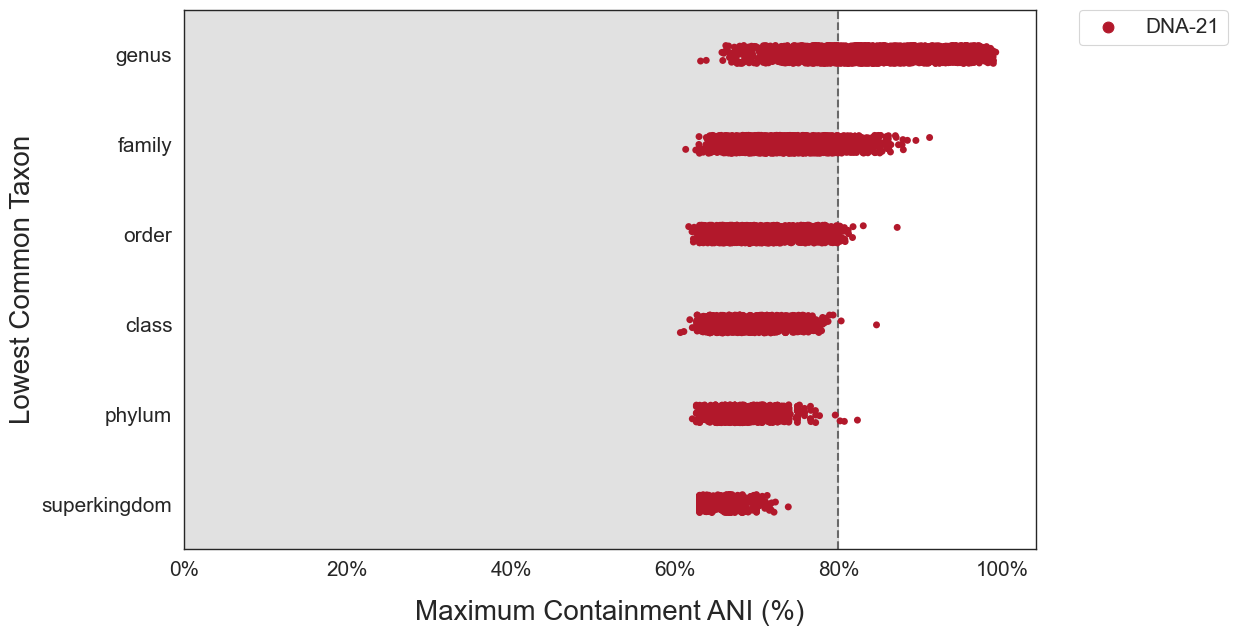

In [232]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("white")
    g=sns.stripplot(data=dna21, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=pd_colors, order=rankorder, dodge=True)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.gcf().set_size_inches(11, 7)
    plt.axvline(x=0.8, lw=1.5, color='dimgray', ls="--")
    plt.axvspan(0, 0.8, alpha=0.2, color='dimgray')
    g.set(xlim=(0, None))
    g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.xlabel("Maximum Containment ANI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    fig = g.get_figure()

    fig.savefig("anchor-mcANI.stripplot.dna21.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
    fig.savefig("anchor-mcANI.stripplot.dna21.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

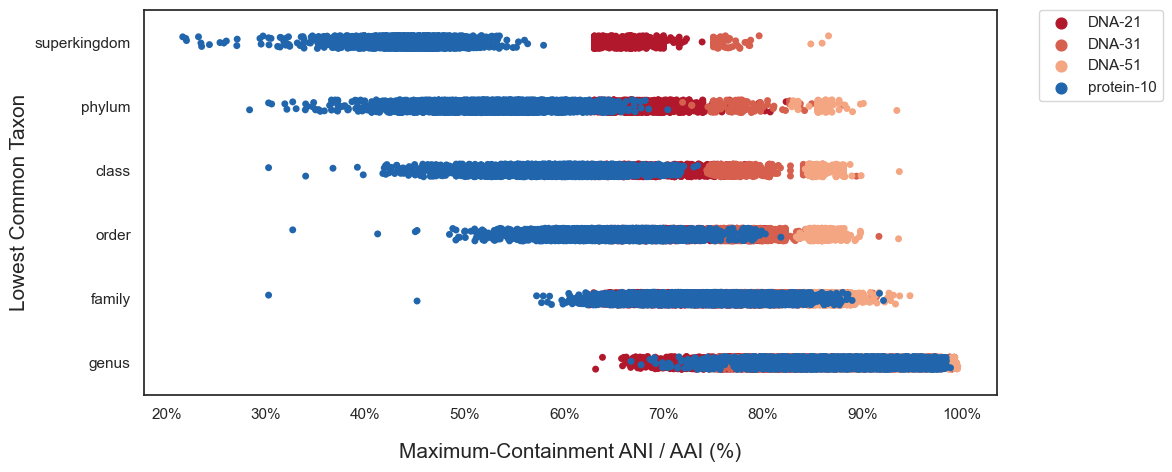

In [198]:
g=sns.stripplot(data=protNucl, y="lowest_common_rank", x="mc_ANI-AAI", hue="alpha-ksize", palette=pd_colors, order=reverse_rankorder, jitter=True)
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Maximum-Containment ANI / AAI (%)", size=15, labelpad=15)
plt.ylabel("Lowest Common Taxon", size=15)
g.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.gcf().set_size_inches(11, 5)
fig = g.get_figure()
fig.savefig("anchor-mcANI-AAI.boxen.protnucl.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [37]:
subsetDNA =  dnaD[dnaD["alpha-ksize"].isin(["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-10"])]

In [38]:
# add query and ref into dnaD
dnaD["query"] = dnaD["comparison_name"]


## summary stats!

In [ ]:
summary_stats.agg({"num_hashes": ["min", "max", "median", "skew"]})# stdev work?


In [ ]:
dnaD.set_index("comparison_name", inplace=True)
dnaD

In [ ]:
fastani = pd.read_csv(fastani_tsv, sep="\t", header=None, names=['query','ref','fastani_ident','count_bidirectional_frag_mappings','total_query_frags'])
fastani["query"] = fastani["query"].str.rsplit("/", 1, expand=True)[1].str.split("_", 1, expand=True)[1].str.rsplit("_protein.faa.gz", 1, expand=True)[0]
fastani["ref"] = fastani["ref"].str.rsplit("/", 1, expand=True)[1].str.split("_", 1, expand=True)[1].str.rsplit("_protein.faa.gz", 1, expand=True)[0]
fastani["comparison_name"] = fastani["query"] + "_x_" + fastani["ref"]
#fastani.drop(columns=["query",'ref'], inplace=True)
#fastani.set_index("comparison_name", inplace=True)
fastani


In [ ]:
# fastani does the analysis in both directions. Are the results identical?
fastani[(fastani["query"] == "GCF_000006945.2") & (fastani["ref"] == "GCA_003325215.1")]
#df.loc[(df.a != 1) | (df.b < 5)]

In [ ]:
fastani[(fastani["ref"] == "GCF_000006945.2") & (fastani["query"] == "GCA_003325215.1")]


In [ ]:
# NOT IDENTICAL. SHOULD I AVERAGE?? how to merge with dnaD dataframe?

In [ ]:
dnaF = dnaD.join(fastani).reset_index()
dnaF